# PLANTILLA MODELIZACIÓN PARA CLASIFICACIÓN

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

**IMPORTANTE**: Esta plantilla está diseñada para una visión de máximos utilizando el framework de The Ultimate Algo Machine. Si tienes problemas de memoria o rendimiento recuerda reducir el problema mediante:

* Muestreo
* Balanceo undersampling
* Reducir el número de algoritmos a testar
* Reducir el número de parámetros a testar
* Usar random search y especificar un n_iter adecuado

## 1. IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report

#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import scikitplot as skplt
#from yellowbrick.classifier import discrimination_threshold

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## 2. IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/Oscar/OneDrive - FM4/Escritorio/Python Data Mastery/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS/007_AIRBNB'

Nombres de los ficheros de datos.

In [3]:
nombre_x = 'x_preseleccionado.pickle'
nombre_y = 'y_preseleccionado.pickle'

Cargar los datos.

In [4]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

## 3. MODELIZAR

### 3.1. Reservar el dataset de validacion

In [5]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### 3.2. Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

Modificar para dejar solo los algoritmos que se quieran testar.

Modificar los parámetros.

In [6]:
pipe = Pipeline([('algoritmo',RandomForestClassifier())])

grid = [{'algoritmo': [LogisticRegression()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__solver': ['saga'],
         'algoritmo__penalty': ['elasticnet', 'l1', 'l2', 'none'],
         'algoritmo__C': [0,0.25,0.5,0.75,1]},
        
        {'algoritmo': [RandomForestClassifier()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__max_depth': [5,10,15],
         'algoritmo__n_estimators': [50,100,200]},
        
        {'algoritmo': [XGBClassifier()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__verbosity': [0],#para que no salgan warnings
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__reg_alpha': [0,0.1,0.5,1],
         'algoritmo__reg_lambda': [0.01,0.1,1],
         'algoritmo__n_estimators': [100,500,1000]},
        
        {'algoritmo': [HistGradientBoostingClassifier()],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_iter': [50,100,200],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__min_samples_leaf': [500],
         'algoritmo__scoring': ['roc_auc'],
         'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]}
       ]

### 3.3. Optimizar los hiper parámetros

Elegir si se quiere usar grid search o random search.

Comentar la opción que no se vaya a usar.

#### 3.3.1.  Con grid search

In [7]:
# grid_search = GridSearchCV(estimator= pipe, 
#                            param_grid = grid, 
#                            cv = 3, 
#                            scoring = 'roc_auc',
#                            verbose = 0,
#                            n_jobs = -1)

# modelo = grid_search.fit(train_x,train_y)

# pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

####  3.3.2. Con random search

In [8]:
#Podemos cambiar el numero de iteraciones y la métrica para que nos de el scoring por si consiguieramos mejores resultados
random_search = RandomizedSearchCV(estimator = pipe,
                                   param_distributions = grid, 
                                   n_iter = 5, 
                                   cv = 3, 
                                   scoring = 'roc_auc', 
                                   verbose = 0,
                                   n_jobs = -1)

modelo = random_search.fit(train_x,train_y)

pd.DataFrame(random_search.cv_results_).sort_values(by = 'rank_test_score')
#Debemos mirar el valor de la columna mean_test_score para compararlo con AUC que nos salga sobre val_y

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo__verbosity,param_algoritmo__reg_lambda,param_algoritmo__reg_alpha,param_algoritmo__n_jobs,param_algoritmo__n_estimators,param_algoritmo__max_depth,...,param_algoritmo__min_samples_leaf,param_algoritmo__max_iter,param_algoritmo__l2_regularization,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,8.15,0.10,0.12,0.02,0,1,0,-1,1000,20,...,NaN,NaN,NaN,"{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",1.00,1.00,1.00,1.00,0.00,1
3,6.06,0.12,0.12,0.00,0,1,1,-1,1000,10,...,NaN,NaN,NaN,"{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",1.00,1.00,1.00,1.00,0.00,2
1,1.33,0.06,0.02,0.00,0,1,0,-1,100,20,...,NaN,NaN,NaN,"{'algoritmo__verbosity': 0, 'algoritmo__reg_la...",0.99,0.99,0.99,0.99,0.00,3
4,0.68,0.06,0.03,0.00,NaN,NaN,NaN,NaN,NaN,20,...,500,100,0.50,"{'algoritmo__scoring': 'roc_auc', 'algoritmo__...",0.99,0.99,0.99,0.99,0.00,4
2,0.66,0.07,0.01,0.00,NaN,NaN,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,"{'algoritmo__solver': 'saga', 'algoritmo__pena...",0.98,0.99,0.99,0.99,0.00,5


## 4. EVALUAR

### 4.1. Predecir sobre validación

In [9]:
pred = modelo.best_estimator_.predict_proba(val_x)[:, 1]

### 4.2. Evaluar sobre validación

In [10]:
roc_auc_score(val_y, pred)
#Comparamos con el valor de mean_test_score. Si sale un AUC mucho mas bajo sobre val_y que sobre train = SOBREAJUSTE 

0.9980589445810705

### 4.3. Examinar el mejor modelo

In [11]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.025, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=20,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=1000,
                               n_jobs=-1, num_parallel_tree=None,
                               random_state=None, ...))])

## 5. REPORTING DEL MODELO

### 5.1. Gain Chart

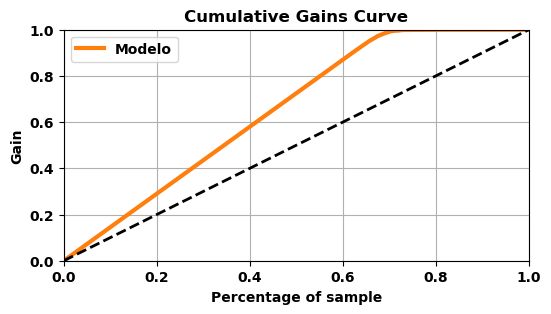

In [12]:
fig, ax = plt.subplots(figsize=(6,3))
skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 
# Eliminamos la línea de los ceros, que internamente tiene etiqueta 'Class 0'
lines = ax.get_lines()
# Buscar por la etiqueta y eliminar la línea correspondiente
for line in lines:
    if line.get_label() == 'Class 0':
        line.remove()
# Personalizamos la leyenda sin incluir la línea de los ceros
plt.legend(labels=['Modelo'])
# Ahora puedes mostrar el gráfico
plt.show()

### 5.2. Lift Chart

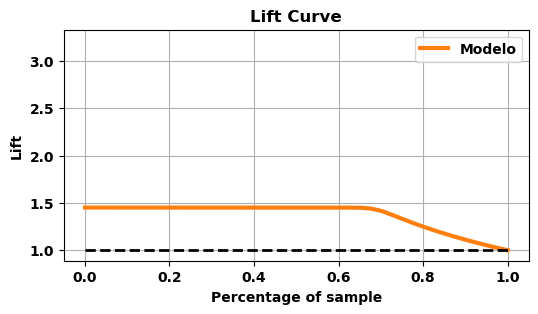

In [13]:
fig, ax = plt.subplots(figsize=(6,3))
skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 
# Eliminamos la línea de los ceros, que internamente tiene etiqueta 'Class 0'
lines = ax.get_lines()
# Buscar por la etiqueta y eliminar la línea correspondiente
for line in lines:
    if line.get_label() == 'Class 0':
        line.remove()
# Personalizamos la leyenda sin incluir la línea de los ceros
plt.legend(labels=['Modelo'])
# Ahora puedes mostrar el gráfico
plt.show()

### 5.3. ROC Chart

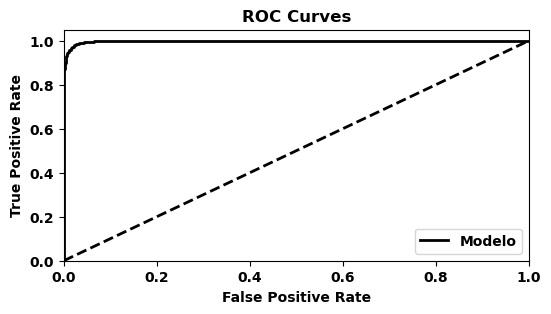

In [14]:
fig, ax = plt.subplots(figsize=(6,3))
# Generamos la gráfica ROC
skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax)
# Obtenemos todas las líneas y las leyendas
lines = ax.get_lines()
# Recorremos las líneas para eliminar las no deseadas, excepto la línea de la clase 0
for line in lines:
    if 'ROC curve of class 0' in line.get_label():
        line.set_label('Modelo')
    elif line.get_linestyle() != '--':  # Mantenemos la línea punteada pero sin leyenda
        line.set_visible(False)
# Solo añadimos al leyenda la línea de la clase 0 renombrada a 'Modelo'
handles, labels = ax.get_legend_handles_labels()
new_handles = [h for h, l in zip(handles, labels) if l == 'Modelo']
new_labels = ['Modelo']
ax.legend(new_handles, new_labels, loc='best')
# Ahora puedes mostrar el gráfico
plt.show();